In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import sys
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from matplotlib import pyplot as plt

In [3]:
tf.random.set_seed(42)

In [4]:
# set attack column in each attack csv file
# path = "/content/drive/MyDrive/MQTT_final/tranalyzer_csv_files/"
# file_names = ["attack1_flows.csv","attack3_flows.csv","attack4_flows.csv","attack5_flows.csv","attack6_flows.csv","attack8_flows.csv"]
# for file in file_names:
#   df = pd.read_csv(path + file)
#   print(file)
#   attack = []
#   for value in df['srcIP']:
#     # print(value, value.split('.'))
#     if value.split('.')[0] == '157':
#       attack.append(1)
#     else:
#       attack.append(0)
#   df['attack'] = attack
#   # print(df.head())
#   df.to_csv(path + 'modif_' + file, index = False)

In [5]:
# combine all flow files into a single dataframe
path = "/content/drive/MyDrive/MQTT_final/tranalyzer_csv_files/"
file_names = ["modif_attack1_flows.csv","modif_attack3_flows.csv","modif_attack4_flows.csv","modif_attack5_flows.csv","modif_attack6_flows.csv","modif_attack8_flows.csv"]
main_df = pd.DataFrame()
attack_type = 1
for file in file_names:
  attack = []
  curr_dataframe = pd.read_csv(path+file)
  #iterate over all rows in curr data frame and add an extra column to the data frame, whose value = attack_type if last column value is 1 else 0
  for value in curr_dataframe["attack"]:
    if value == 0:
      attack.append(0)
    elif value == 1:
      attack.append(attack_type)
  curr_dataframe["attack_type"] = attack
  attack_type = attack_type+1
  main_df = main_df.append(curr_dataframe,ignore_index = True)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (102,104,106) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [6]:
main_df.shape
print(main_df.columns)

Index(['%dir', 'flowInd', 'flowStat', 'timeFirst', 'timeLast', 'duration',
       'numHdrDesc', 'numHdrs', 'hdrDesc', 'srcMac',
       ...
       'mqttClientID', 'mqttConAck', 'mqttTopic', 'connSip', 'connDip',
       'connSipDip', 'connSipDprt', 'connF', 'attack', 'attack_type'],
      dtype='object', length=114)


In [7]:
main_df.info()
cols = main_df.columns
for col in cols:
  print(col, end = ',')
  if col == 'dstPort' or col == 'minIAT' or col == 'ip6OptHH_D' or col == 'tcpMaxWinSz' or col == 'tcpTmS' or col == 'icmpStat' or col == 'connDip':
    print('\n')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243030 entries, 0 to 243029
Columns: 114 entries, %dir to attack_type
dtypes: float64(24), int64(53), object(37)
memory usage: 211.4+ MB
%dir,flowInd,flowStat,timeFirst,timeLast,duration,numHdrDesc,numHdrs,hdrDesc,srcMac,dstMac,ethType,srcIP,srcIPCC,srcIPOrg,srcPort,dstIP,dstIPCC,dstIPOrg,dstPort,

l4Proto,macStat,macPairs,srcMac_dstMac_numP,dstPortClassN,dstPortClass,numPktsSnt,numPktsRcvd,numBytesSnt,numBytesRcvd,minPktSz,maxPktSz,avePktSize,stdPktSize,minIAT,

maxIAT,aveIAT,stdIAT,pktps,bytps,pktAsm,bytAsm,tcpFStat,ipMindIPID,ipMaxdIPID,ipMinTTL,ipMaxTTL,ipTTLChg,ipToS,ipFlags,ipOptCnt,ipOptCpCl_Num,ip6OptCntHH_D,ip6OptHH_D,

tcpISeqN,tcpPSeqCnt,tcpSeqSntBytes,tcpSeqFaultCnt,tcpPAckCnt,tcpFlwLssAckRcvdBytes,tcpAckFaultCnt,tcpBFlgtMx,tcpInitWinSz,tcpAveWinSz,tcpMinWinSz,tcpMaxWinSz,

tcpWinSzDwnCnt,tcpWinSzUpCnt,tcpWinSzChgDirCnt,tcpWinSzThRt,tcpFlags,tcpAnomaly,tcpOptPktCnt,tcpOptCnt,tcpOptions,tcpMSS,tcpWS,tcpMPTBF,tcpMPF,tcpMPAID,t

In [8]:
print(main_df['attack'].unique())
print(main_df['attack_type'].value_counts())

[0 1]
0    133840
3    100494
4      2488
5      1963
6      1626
1      1481
2      1138
Name: attack_type, dtype: int64


In [9]:
main_df.head()

,%dir,flowInd,flowStat,timeFirst,timeLast,duration,numHdrDesc,numHdrs,hdrDesc,srcMac,...,mqttClientID,mqttConAck,mqttTopic,connSip,connDip,connSipDip,connSipDprt,connF,attack,attack_type
0,A,4,0x0400000000004000,1.643436e+09,1.643436e+09,0.067943,1,3,eth:ipv4:tcp,42:01:0a:b6:00:01,...,NaN,0x00,NaN,1,3,4,4,4.0,0,0
1,B,4,0x0400000000004001,1.643436e+09,1.643436e+09,0.000093,1,3,eth:ipv4:tcp,42:01:0a:b6:00:03,...,NaN,0x00,NaN,3,1,3,3,1.0,0,0
2,A,6,0x0400000000004000,1.643436e+09,1.643436e+09,0.030442,1,3,eth:ipv4:tcp,42:01:0a:b6:00:01,...,NaN,0x00,NaN,1,3,4,4,4.0,0,0
3,B,6,0x0400000000004001,1.643436e+09,1.643436e+09,0.000068,1,3,eth:ipv4:tcp,42:01:0a:b6:00:03,...,NaN,0x00,NaN,3,1,3,3,1.0,0,0
4,A,7,0x0400000000004000,1.643436e+09,1.643436e+09,1.065499,1,3,eth:ipv4:tcp,42:01:0a:b6:00:01,...,B80MJZHREG,0x00,test,1,3,4,4,4.0,0,0


In [10]:
nunique = main_df.nunique()
cols_to_drop = nunique[nunique == 1].index
main_df.drop(cols_to_drop, axis=1, inplace = True)
print(main_df.shape)
print(main_df.columns)

(243030, 98)
Index(['%dir', 'flowInd', 'flowStat', 'timeFirst', 'timeLast', 'duration',
       'numHdrs', 'hdrDesc', 'srcMac', 'dstMac', 'ethType', 'srcIP', 'srcIPCC',
       'srcIPOrg', 'srcPort', 'dstIP', 'dstIPCC', 'dstIPOrg', 'dstPort',
       'l4Proto', 'srcMac_dstMac_numP', 'dstPortClassN', 'dstPortClass',
       'numPktsSnt', 'numPktsRcvd', 'numBytesSnt', 'numBytesRcvd', 'minPktSz',
       'maxPktSz', 'avePktSize', 'stdPktSize', 'maxIAT', 'aveIAT', 'stdIAT',
       'pktps', 'bytps', 'pktAsm', 'bytAsm', 'tcpFStat', 'ipMindIPID',
       'ipMaxdIPID', 'ipMinTTL', 'ipMaxTTL', 'ipTTLChg', 'ipToS', 'ipFlags',
       'tcpISeqN', 'tcpPSeqCnt', 'tcpSeqSntBytes', 'tcpSeqFaultCnt',
       'tcpPAckCnt', 'tcpFlwLssAckRcvdBytes', 'tcpAckFaultCnt', 'tcpBFlgtMx',
       'tcpInitWinSz', 'tcpAveWinSz', 'tcpMinWinSz', 'tcpMaxWinSz',
       'tcpWinSzDwnCnt', 'tcpWinSzUpCnt', 'tcpWinSzChgDirCnt', 'tcpFlags',
       'tcpAnomaly', 'tcpOptPktCnt', 'tcpOptCnt', 'tcpOptions', 'tcpMSS',
       'tcpWS', 't

In [11]:
cols_to_drop = ['connSip','connDip','connSipDip','connSipDprt','connF','timeFirst','timeLast','tcpBtm','tcpUtm','tcpTmER','tcpTmS','flowInd','hdrDesc','srcMac','dstMac','srcIP','srcIPCC','srcIPOrg','srcPort','dstIP','dstIPCC','dstIPOrg','dstPort','srcMac_dstMac_numP','dstPortClass','tcpISeqN','mqttClientID','mqttTopic','icmpBFTypH_TypL_Code']
print(len(cols_to_drop))

29


In [12]:
main_df.drop(cols_to_drop, axis = 1, inplace = True)
main_df.shape

(243030, 69)

In [13]:
main_df.head(10)

,%dir,flowStat,duration,numHdrs,ethType,l4Proto,dstPortClassN,numPktsSnt,numPktsRcvd,numBytesSnt,...,tcpStatesAFlags,icmpStat,icmpTCcnt,icmpEchoSuccRatio,mqttStat,mqttCPT,mqttProtoLevel,mqttConAck,attack,attack_type
0,A,0x0400000000004000,0.067943,3,0x0800,6,1883,4,2,2,...,0x53,0x00,0,0,0x01,0x4000,0,0x00,0,0
1,B,0x0400000000004001,0.000093,3,0x0800,6,1883,2,4,0,...,0x03,0x00,0,0,0x01,0x0000,0,0x00,0,0
2,A,0x0400000000004000,0.030442,3,0x0800,6,1883,4,2,2,...,0x53,0x00,0,0,0x01,0x4000,0,0x00,0,0
3,B,0x0400000000004001,0.000068,3,0x0800,6,1883,2,4,0,...,0x03,0x00,0,0,0x01,0x0000,0,0x00,0,0
4,A,0x0400000000004000,1.065499,3,0x0800,6,1883,8,5,57,...,0x52,0x00,0,0,0x81,0x400a,4,0x00,0,0
5,B,0x0400000000004001,1.033547,3,0x0800,6,1883,5,8,4,...,0x02,0x00,0,0,0x81,0x0004,0,0x01,0,0
6,A,0x0400000000004000,0.369930,3,0x0800,6,1883,4,4,56,...,0x02,0x00,0,0,0x01,0x4002,4,0x00,1,1
7,B,0x0400000000004001,0.370033,3,0x0800,6,1883,4,4,4,...,0x42,0x00,0,0,0x81,0x0004,0,0x20,0,0
8,A,0x0400000000004000,0.030956,3,0x0800,6,1883,3,1,2,...,0x53,0x00,0,0,0x01,0x4000,0,0x00,0,0
9,B,0x0400000000004001,0.000000,3,0x0800,6,1883,1,3,0,...,0x03,0x00,0,0,0x01,0x0000,0,0x00,0,0


In [14]:
hex_cols = ['flowStat','ethType','ipToS','ipFlags','tcpFlags','tcpFStat','tcpAnomaly','tcpOptions','tcpStatesAFlags','icmpStat','mqttStat','mqttCPT','mqttConAck']
for col in hex_cols:
  main_df[col] = main_df[col].apply(int, base=16)

In [15]:
import numpy as np
main_df['%dir'] = np.where(main_df['%dir'] == 'A', 1, main_df['%dir'])
main_df['%dir'] = np.where(main_df['%dir'] == 'B', -1, main_df['%dir'])

In [16]:
convert_dict = {'%dir':int}
main_df = main_df.astype(convert_dict)

In [17]:
main_df.shape
main_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243030 entries, 0 to 243029
Data columns (total 69 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   %dir                   243030 non-null  int64  
 1   flowStat               243030 non-null  int64  
 2   duration               243030 non-null  float64
 3   numHdrs                243030 non-null  int64  
 4   ethType                243030 non-null  int64  
 5   l4Proto                243030 non-null  int64  
 6   dstPortClassN          243030 non-null  int64  
 7   numPktsSnt             243030 non-null  int64  
 8   numPktsRcvd            243030 non-null  int64  
 9   numBytesSnt            243030 non-null  int64  
 10  numBytesRcvd           243030 non-null  int64  
 11  minPktSz               243030 non-null  int64  
 12  maxPktSz               243030 non-null  int64  
 13  avePktSize             243030 non-null  float64
 14  stdPktSize             243030 non-nu

In [18]:
main_df.head(10)

,%dir,flowStat,duration,numHdrs,ethType,l4Proto,dstPortClassN,numPktsSnt,numPktsRcvd,numBytesSnt,...,tcpStatesAFlags,icmpStat,icmpTCcnt,icmpEchoSuccRatio,mqttStat,mqttCPT,mqttProtoLevel,mqttConAck,attack,attack_type
0,1,288230376151728128,0.067943,3,2048,6,1883,4,2,2,...,83,0,0,0,1,16384,0,0,0,0
1,-1,288230376151728129,0.000093,3,2048,6,1883,2,4,0,...,3,0,0,0,1,0,0,0,0,0
2,1,288230376151728128,0.030442,3,2048,6,1883,4,2,2,...,83,0,0,0,1,16384,0,0,0,0
3,-1,288230376151728129,0.000068,3,2048,6,1883,2,4,0,...,3,0,0,0,1,0,0,0,0,0
4,1,288230376151728128,1.065499,3,2048,6,1883,8,5,57,...,82,0,0,0,129,16394,4,0,0,0
5,-1,288230376151728129,1.033547,3,2048,6,1883,5,8,4,...,2,0,0,0,129,4,0,1,0,0
6,1,288230376151728128,0.369930,3,2048,6,1883,4,4,56,...,2,0,0,0,1,16386,4,0,1,1
7,-1,288230376151728129,0.370033,3,2048,6,1883,4,4,4,...,66,0,0,0,129,4,0,32,0,0
8,1,288230376151728128,0.030956,3,2048,6,1883,3,1,2,...,83,0,0,0,1,16384,0,0,0,0
9,-1,288230376151728129,0.000000,3,2048,6,1883,1,3,0,...,3,0,0,0,1,0,0,0,0,0


In [19]:
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
scalable_columns = main_df.columns.values.tolist()
scalable_columns.remove('attack')
scalable_columns.remove('attack_type')
main_df[scalable_columns] = mms.fit_transform(main_df[scalable_columns])

In [20]:
grouped_dataframe = main_df.groupby(main_df.attack_type)
normal_df = grouped_dataframe.get_group(0).copy()
normal_df = normal_df.sample(frac = 1, random_state=123)
train_df_frac = normal_df.head(int(0.9 * normal_df.shape[0]))
################
# train_df_frac = normal_df.sample(frac = 0.1, random_state=123)
# normal_test_df = normal_df.sample(frac = 0.02, random_state = 45)
normal_test_df = normal_df.tail(int(0.1 * normal_df.shape[0]))
attack1_df = grouped_dataframe.get_group(1).copy()
attack3_df = grouped_dataframe.get_group(2).copy()
attack4_df = grouped_dataframe.get_group(3).copy(); attack4_df_frac = attack4_df.sample(frac = 0.01)
attack5_df = grouped_dataframe.get_group(4).copy()
attack6_df = grouped_dataframe.get_group(5).copy()
attack8_df = grouped_dataframe.get_group(6).copy()

sampled_test_df = pd.DataFrame()
sampled_test_df = sampled_test_df.append([normal_test_df,attack1_df,attack3_df,attack4_df_frac,attack5_df,attack6_df,attack8_df],ignore_index = True)

X_test_attack = pd.DataFrame()
X_test_attack = X_test_attack.append([attack1_df,attack3_df,attack4_df_frac,attack5_df,attack6_df,attack8_df],ignore_index = True)

In [21]:
# path_to_save_train_test_df = "/content/drive/MyDrive/MQTT_final/tranalyzer_csv_files/"
# # train_df_frac.to_csv(path_to_save_train_test_df + "backup_train_df.csv")
# # sampled_test_df.to_csv(path_to_save_train_test_df + "backup_test_df.csv")
# backup_train_df = pd.read_csv(path_to_save_train_test_df + "backup_train_df.csv",index_col=0)
# backup_test_df = pd.read_csv(path_to_save_train_test_df + "backup_test_df.csv",index_col=0)
# print(train_df_frac.iloc[0].equals(backup_train_df.iloc[0]))
# print(train_df_frac.iloc[0])
# print(backup_train_df.iloc[0])
# # print(pd.util.testing.assert_frame_equal(backup_train_df, train_df_frac))
# print(sampled_test_df.equals(backup_test_df))
# print(backup_train_df.shape, train_df_frac.shape)

In [22]:
sampled_test_df_copy = sampled_test_df.copy()

In [23]:
train_df_frac = train_df_frac.drop(['attack','attack_type'], axis = 1)
print(train_df_frac.shape)

y_test_binary = sampled_test_df['attack']
print(sampled_test_df.shape)
sampled_test_df.drop(['attack','attack_type'],axis=1,inplace=True)

(120456, 67)
(23085, 69)


In [24]:
print(y_test_binary.value_counts())

0    13384
1     9701
Name: attack, dtype: int64


In [25]:
### Isolation Forest ###
from sklearn.ensemble import IsolationForest

rng = np.random.RandomState(42)
clf = IsolationForest(random_state=rng)
clf.fit(train_df_frac.values)
y_pred = clf.predict(sampled_test_df.values)
y_pred = (y_pred < 0).astype(int)

from sklearn.metrics import accuracy_score, precision_score,recall_score, f1_score
print(accuracy_score(y_test_binary, y_pred))
print(precision_score(y_test_binary, y_pred))
print(recall_score(y_test_binary, y_pred))
print(f1_score(y_test_binary, y_pred))

0.8250812215724497
0.7376416281997482
0.9059890732914132
0.8131939304219096


In [26]:
### one class SVM ###
from sklearn.svm import OneClassSVM
clf = OneClassSVM(nu=0.1, kernel="rbf", gamma=0.1)
clf.fit(train_df_frac.values)
y_pred = clf.predict(sampled_test_df.values)
y_pred = (y_pred < 0).astype(int)

from sklearn.metrics import accuracy_score, precision_score,recall_score, f1_score
print(accuracy_score(y_test_binary, y_pred))
print(precision_score(y_test_binary, y_pred))
print(recall_score(y_test_binary, y_pred))
print(f1_score(y_test_binary, y_pred))

0.8686593025774312
0.8811292719167905
0.7946603442944027
0.8356639566395664


In [ ]:
import tensorflow
from tensorflow import keras
from keras.layers import Dense, Dropout
# Get model
encoder_inputs = keras.Input(shape=(67), name="enc_input_layer")
x = Dense(50,activation='relu')(encoder_inputs)
x = Dropout(0.1)(x)
x = Dense(32, activation='relu')(x)
x = Dropout(0.1)(x)
encoder_outputs = Dense(3, activation='relu')(x)

##### creating model for encoder ####
encoder_model = keras.Model(inputs = encoder_inputs,outputs = encoder_outputs)

################################################################################

decoder_inputs = keras.Input(shape=(3),name = 'dec_input_layer')
# x = Dropout(0.1)(decoder_inputs)
x = Dense(32, activation='relu')(decoder_inputs)
# x = Dense(32, activation='relu')(x)
x = Dropout(0.1)(x)
x = Dense(50, activation='relu')(x)
x = Dropout(0.1)(x)
decoder_outputs = Dense(67, activation='relu')(x)
#### creating model for decoder ####
decoder_model = keras.Model(inputs = decoder_inputs,outputs = decoder_outputs)
################################################################################

autoencoder_input = keras.Input(shape=(67), name="auto_encoder_inputs")
encoding = encoder_model(autoencoder_input)
decoding = decoder_model(encoding)
model = keras.Model(inputs=autoencoder_input, outputs=decoding)

In [ ]:
model.compile(optimizer='adam', loss='bce')
# model.compile(optimizer='adam', loss='mse')
history = model.fit(train_df_frac,train_df_frac, epochs=40, batch_size=64,validation_data=(sampled_test_df, sampled_test_df),
               shuffle=True)

Epoch 1/40
1883/1883 [==============================] - 8s 3ms/step - loss: 0.1406 - val_loss: 0.1933
Epoch 2/40
1883/1883 [==============================] - 6s 3ms/step - loss: 0.1066 - val_loss: 0.1848
Epoch 3/40
1883/1883 [==============================] - 6s 3ms/step - loss: 0.1038 - val_loss: 0.1895
Epoch 4/40
1883/1883 [==============================] - 6s 3ms/step - loss: 0.1009 - val_loss: 0.1820
Epoch 5/40
1883/1883 [==============================] - 6s 3ms/step - loss: 0.0988 - val_loss: 0.1911
Epoch 6/40
1883/1883 [==============================] - 6s 3ms/step - loss: 0.0974 - val_loss: 0.1755
Epoch 7/40
1883/1883 [==============================] - 10s 5ms/step - loss: 0.0967 - val_loss: 0.1765
Epoch 8/40
1883/1883 [==============================] - 6s 3ms/step - loss: 0.0962 - val_loss: 0.1780
Epoch 9/40
1883/1883 [==============================] - 6s 3ms/step - loss: 0.0954 - val_loss: 0.1957
Epoch 10/40
1883/1883 [==============================] - 6s 3ms/step - loss: 0.09

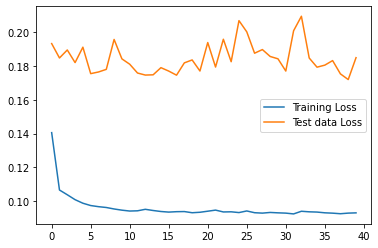

In [ ]:
plt.plot(history.history["loss"], label="Training Loss")
plt.plot(history.history["val_loss"], label="Test data Loss")
plt.legend()

In [ ]:
from sklearn.model_selection import train_test_split
test_data_df, valid_data_df = train_test_split(
     sampled_test_df_copy, test_size=0.50, random_state=53)

val_labels = valid_data_df['attack']
val_data = valid_data_df.drop(['attack','attack_type'],axis=1)
test_labels = test_data_df['attack']
test_data = test_data_df.drop(['attack','attack_type'],axis=1)

tf.Tensor(
[-3.78276839 -3.78276839 -3.78276839 ... -3.78276839  0.08774645
 -3.78273954], shape=(120456,), dtype=float64)
(120456,)


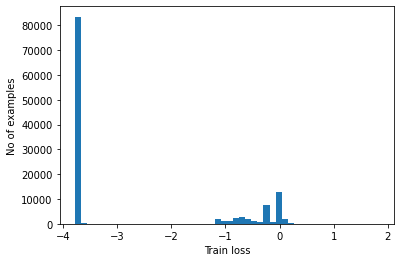

In [ ]:
train_reconstructions = model.predict(train_df_frac)
train_loss = keras.losses.binary_crossentropy(train_reconstructions, train_df_frac)
# train_loss = keras.losses.mean_squared_error(train_reconstructions, train_df_frac)
print(train_loss)
print(train_loss.shape)

plt.hist(train_loss, bins=50)
plt.xlabel("Train loss")
plt.ylabel("No of examples")
plt.show()

In [ ]:
import numpy as np
train_loss_mean = np.mean(train_loss) 
train_loss_std =  np.std(train_loss)
lower_threshold = train_loss_mean - train_loss_std
upper_one_sigma = train_loss_mean + 1*train_loss_std
upper_two_sigma = train_loss_mean + 2*train_loss_std
upper_three_sigma = train_loss_mean + 3*train_loss_std

print("Mean Loss on Train Data: ", train_loss_mean)
print("Std of Loss on Train Data: ",train_loss_std)
print("Upper Threshold: ", upper_one_sigma)

Mean Loss on Train Data:  -2.7270222730241604
Std of Loss on Train Data:  1.6082112310630845
Upper Threshold:  -1.118811041961076


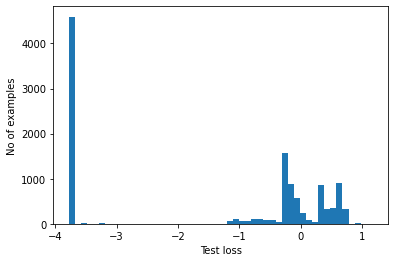

In [ ]:
test_reconstructions = model.predict(test_data)
test_loss = tf.keras.losses.binary_crossentropy(test_reconstructions,test_data)
# test_loss = tf.keras.losses.mean_squared_error(test_reconstructions,test_data)

plt.hist(test_loss, bins=50)
plt.xlabel("Test loss")
plt.ylabel("No of examples")
plt.show()

In [ ]:
from sklearn.metrics import (precision_score, recall_score,f1_score, accuracy_score,mean_squared_error,mean_absolute_error)

def predict(model, data, lower_threshold,upper_threshold):
  reconstructions = model.predict(data)
  loss = tf.keras.losses.binary_crossentropy(reconstructions, data)
  # loss = tf.keras.losses.mean_squared_error(reconstructions, data)
  
  return tf.map_fn(fn = lambda x: 0 if (x<= upper_threshold) else 1, elems = loss,fn_output_signature=tf.int8)
  # return tf.map_fn(fn = lambda x: 0 if (lower_threshold <= x and x<= upper_threshold) else 1, elems = loss,fn_output_signature=tf.int8)

def print_stats(predictions, labels):
  print("Accuracy = {}".format(accuracy_score(labels, predictions)))
  print("Precision = {}".format(precision_score(labels, predictions)))
  print("Recall = {}".format(recall_score(labels, predictions)))
  print("f1 Score = {}".format(f1_score(labels, predictions)))

In [ ]:
# upper one sigma
print('test data, upper_one_sigma:')
preds = predict(model, test_data, lower_threshold, upper_one_sigma)
print_stats(preds, test_labels)
#upper two sigma
print('test data, upper_two_sigma:')
preds = predict(model, test_data, lower_threshold, upper_two_sigma)
print_stats(preds, test_labels)
#upper three sigma
print('test data, upper_three_sigma:')
preds = predict(model, test_data, lower_threshold, upper_three_sigma)
print_stats(preds, test_labels)

test data, upper_one_sigma:
Accuracy = 0.8258534049558135
Precision = 0.7111400840214399
Recall = 0.996751269035533
f1 Score = 0.8300642543118025
test data, upper_two_sigma:
Accuracy = 0.7075896725004333
Precision = 0.9942602040816326
Recall = 0.3165482233502538
f1 Score = 0.48020945633759426
test data, upper_three_sigma:
Accuracy = 0.5732975220932247
Precision = 0.0
Recall = 0.0
f1 Score = 0.0


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import precision_recall_curve
from scipy.interpolate import interp1d
import seaborn as sns
from sklearn.metrics import confusion_matrix

def find_thresh(model, val_data, val_labels, viz=False):
  
    errors_plot = {0:[], 1:[]}
    
    labels = val_labels.copy()
    labels.reset_index(inplace = True, drop=True)
    # print(labels, type(labels))
    anomaly_scores = keras.losses.binary_crossentropy(model.predict(val_data), val_data)
    # anomaly_scores = keras.losses.mean_squared_error(model.predict(val_data), val_data)

    precision, recall, thresholds = precision_recall_curve(labels, anomaly_scores)
    print(precision,recall,thresholds)
    precision = precision[1:]
    recall = recall[1:]

    print(len(anomaly_scores), len(labels)) 
    for ind in range(len(anomaly_scores)):
      # print(ind); print(labels[ind])
      if labels[ind] == 0:
        errors_plot[0].append(anomaly_scores[ind])
      elif labels[ind] == 1:
        errors_plot[1].append(anomaly_scores[ind])
    
    # calculate the intercept between precision and recall to find best trade-off
    # from https://stackoverflow.com/questions/3252194/numpy-and-line-intersections
    thresh = interp1d(precision - recall, thresholds)(0)
    pr_intersect = interp1d(thresholds, precision)(thresh)

    if viz == True:
        # precision recall
        plt.figure(figsize=(5,5), dpi=200)
        plt.plot(thresholds, precision, label='precision')
        plt.plot(thresholds, recall, label='recall')
        plt.scatter(thresh, pr_intersect, marker='*', c='black', label='threshold')
        plt.ylabel('Precision/Recall')
        plt.xlabel('Threshold')
        plt.legend()
        plt.show()

        # anomaly score histogram
        plt.figure(figsize=(5,5), dpi=200)
        plt.hist(errors_plot[0], bins=100, color='b', alpha=.5, label='normal')
        plt.hist(errors_plot[1], bins=100, color='r', alpha=.5, label='attack')
        plt.axvline(thresh, linestyle='--', c='black', label='threshold')
        plt.ylabel('Density')
        plt.xlabel('Anomaly score')
        plt.legend()
        plt.show()

        # ROC
        plt.figure(figsize=(5,5), dpi=200)
        fp, tp, _ = roc_curve(labels, anomaly_scores)
        auroc = auc(fp, tp)

        auroc = float('{:.2f}'.format(auroc))
        n = f'auroc = {auroc}'

        plt.plot(fp, tp, label=n)
        plt.title('Receiver Operating Characteristic (ROC)')
        plt.xlabel('False Positives')
        plt.ylabel('True Positives')
        ax = plt.gca()
        ax.set_aspect('equal')
        plt.legend()
        plt.show()

    return thresh.item()

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def evaluate(model, test_data,test_labels, thresh):
    """
    Use the AAE for inference over the `test_dataloader` data. A label is assigned 
    depending on whether the anomaly_score, defined as the error between the original
    image and its reconstruction, is above or below `thresh`.

    Inputs:
    -------
    test_dataloader: a `DataLoader` based on MQTT flow dataset

    thresh: a number that defines the label of an input image according to the error
    between the original image and its reconstruction. If error > thresh, label = 1; 
    if error <= thresh, label = 0 (float)
    """
    true_labels = test_labels
    predictions_ = keras.losses.binary_crossentropy(model.predict(test_data),test_data)
    # predictions_ = keras.losses.mean_squared_error(model.predict(test_data),test_data)

    predictions =  tf.map_fn(fn = lambda x: 0 if (x<= thresh) else 1, elems = predictions_,fn_output_signature=tf.int8)
    
    # plot confusion matrix
    cm = confusion_matrix(true_labels, predictions)
    group_counts = ['{0:0.0f}'.format(value) for value in cm.flatten()]
    group_percentages = ['({0:.2%})'.format(value) for value in cm.flatten()/np.sum(cm)]
    labels = [f'{v1}\n{v2}' for v1, v2 in zip(group_counts, group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    tn, fp, fn, tp = cm.ravel()

    plt.figure(figsize=(5,5), dpi=200)
    sns.heatmap(cm, annot=labels, fmt="")
    plt.title('Confusion matrix')
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')
    plt.show()

    
    print(accuracy_score(true_labels, predictions),precision_score(true_labels, predictions, average = 'weighted'),recall_score(true_labels, predictions, average = 'weighted'),f1_score(true_labels, predictions, average = 'macro'))
    print(accuracy_score(true_labels, predictions),precision_score(true_labels, predictions, average = 'weighted'),recall_score(true_labels, predictions, average = 'weighted'),f1_score(true_labels, predictions, average = 'weighted'))
    return [accuracy_score(true_labels, predictions),precision_score(true_labels, predictions, average = 'weighted'),recall_score(true_labels, predictions, average = 'weighted'),f1_score(true_labels, predictions, average = 'weighted')]

[0.69742991 0.69734151 0.69716457 ... 0.5        1.         1.        ] [1.00000000e+00 9.99581240e-01 9.98743719e-01 ... 2.09380235e-04
 2.09380235e-04 0.00000000e+00] [-3.26314242 -3.26311311 -3.26255351 ...  1.09616907  1.17287485
  1.2929929 ]
11543 11543


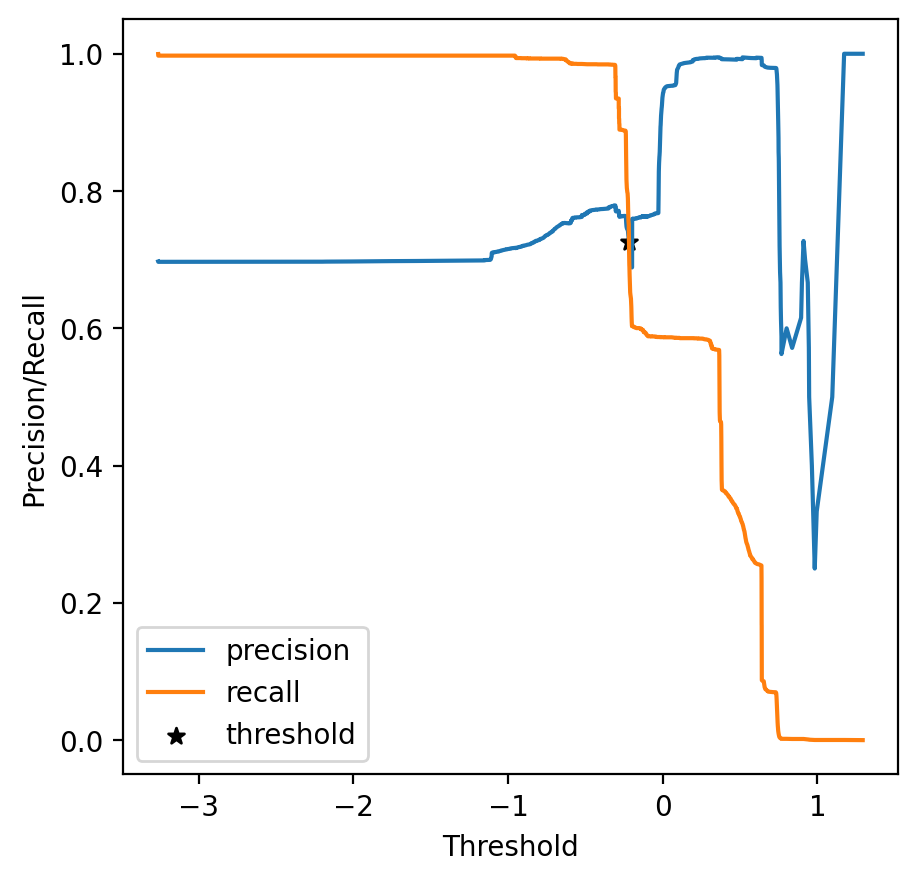

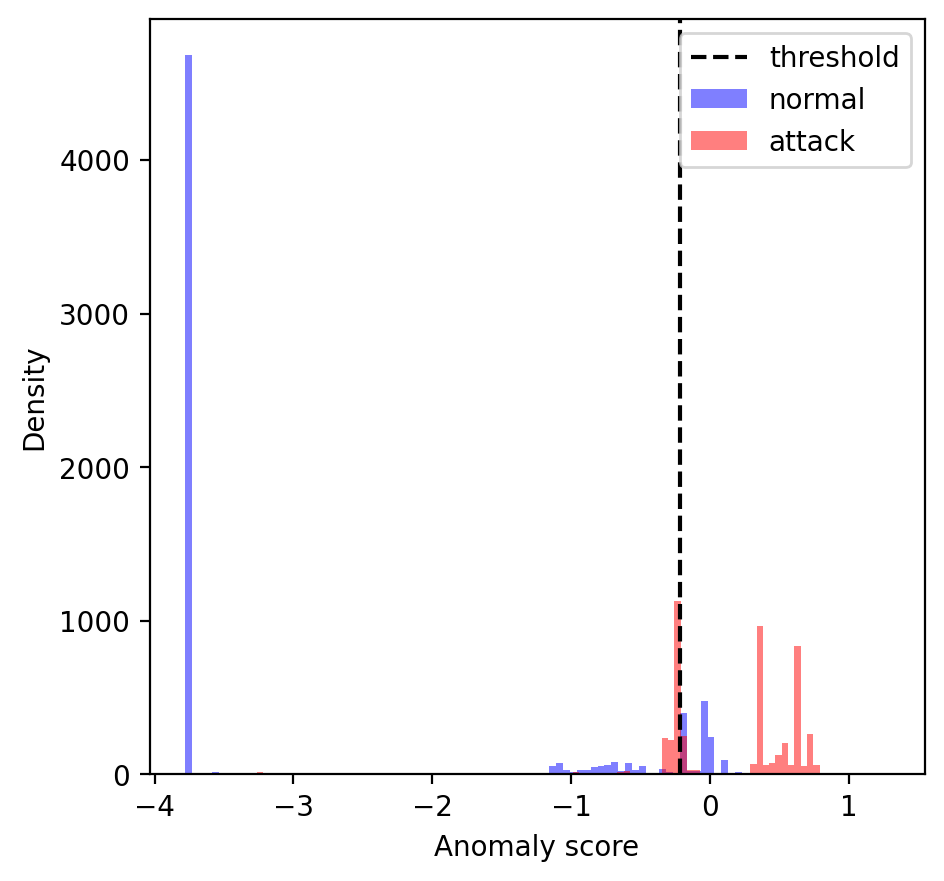

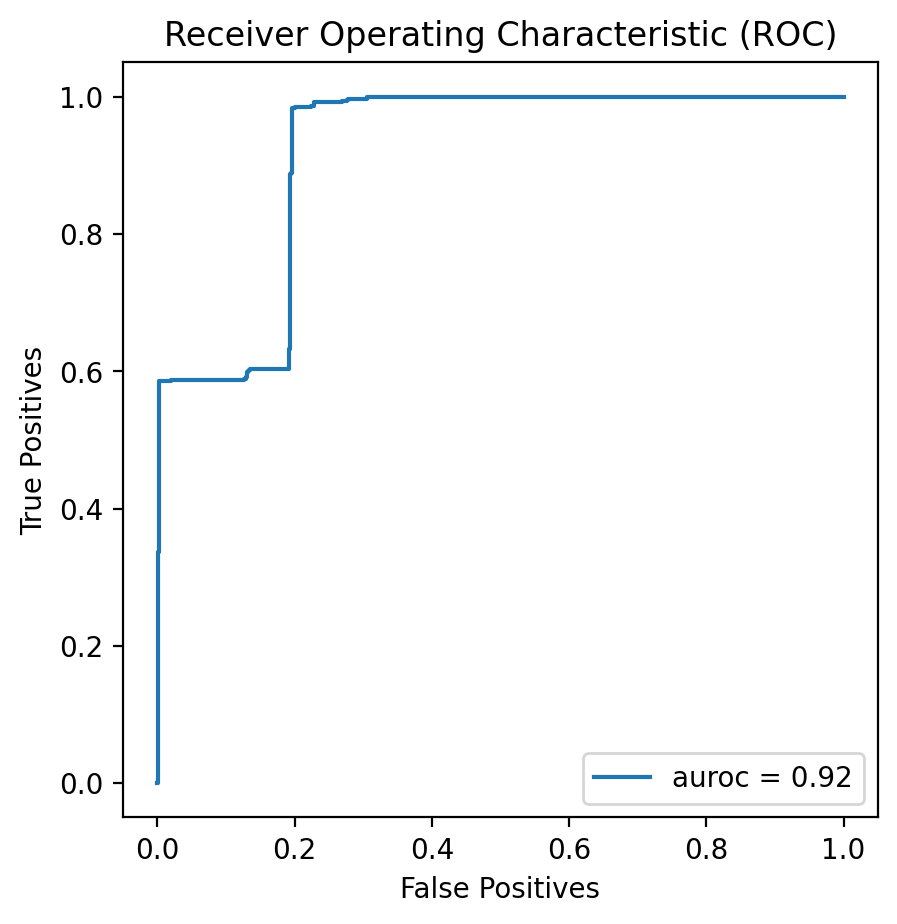

-0.21821051265448727

In [ ]:
thresh_scratch = find_thresh(model, val_data, val_labels, viz=True)
thresh_scratch

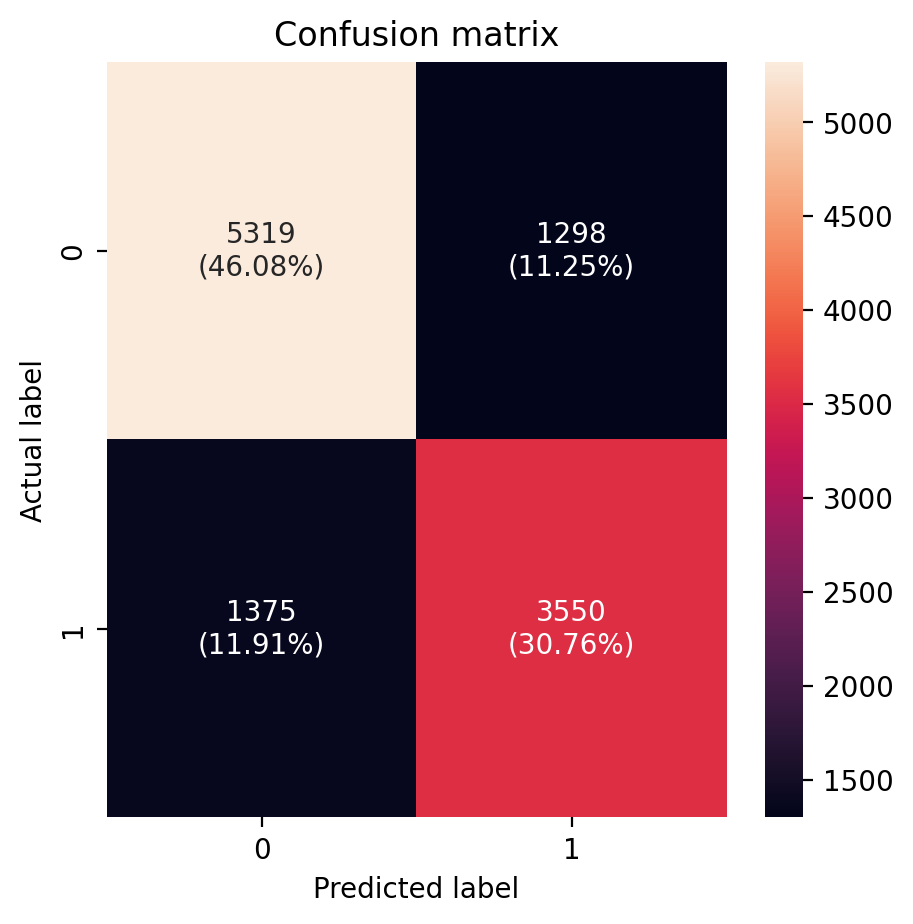

0.768411020620343 0.767995189625396 0.768411020620343 0.7628399973516471
0.768411020620343 0.767995189625396 0.768411020620343 0.7681685283695293


In [ ]:
dec_list = evaluate(model, test_data, test_labels ,thresh_scratch)

In [ ]:
print(dec_list)

[0.768411020620343, 0.767995189625396, 0.768411020620343, 0.7681685283695293]


In [ ]:
def get_f1score(predictions,true_labels, thresh):
  predictions =  tf.map_fn(fn = lambda x: 0 if (x<= thresh) else 1, elems = predictions,fn_output_signature=tf.int8)
  f1_weighted = f1_score(true_labels, predictions, average = 'weighted')
  f1_macro = f1_score(true_labels, predictions, average = 'macro')
  return f1_weighted,f1_macro

In [ ]:
import numpy as np
threshold_vals = np.arange(0,1.0,0.01)
print(threshold_vals.shape)
thresh_weighted = {}; thresh_macro = {}

predictions_ = keras.losses.binary_crossentropy(model.predict(test_data),test_data)
# predictions_ = keras.losses.mean_squared_error(model.predict(test_data),test_data)

for value in threshold_vals:
  print(value)
  thresh_weighted[value],thresh_macro[value] = get_f1score(predictions_,test_labels,value)

best_thresh_weighted = max(thresh_weighted, key=thresh_weighted.get)
best_thresh_macro = max(thresh_macro, key = thresh_macro.get)
print(best_thresh_weighted)

(100,)
0.0
0.01
0.02
0.03
0.04
0.05
0.06
0.07
0.08
0.09
0.1
0.11
0.12
0.13
0.14
0.15
0.16
0.17
0.18
0.19
0.2
0.21
0.22
0.23
0.24
0.25
0.26
0.27
0.28
0.29
0.3
0.31
0.32
0.33
0.34
0.35000000000000003
0.36
0.37
0.38
0.39
0.4
0.41000000000000003
0.42
0.43
0.44
0.45
0.46
0.47000000000000003
0.48
0.49
0.5
0.51
0.52
0.53
0.54
0.55
0.56
0.5700000000000001
0.58
0.59
0.6
0.61
0.62
0.63
0.64
0.65
0.66
0.67
0.68
0.6900000000000001
0.7000000000000001
0.71
0.72
0.73
0.74
0.75
0.76
0.77
0.78
0.79
0.8
0.81
0.8200000000000001
0.8300000000000001
0.84
0.85
0.86
0.87
0.88
0.89
0.9
0.91
0.92
0.93
0.9400000000000001
0.9500000000000001
0.96
0.97
0.98
0.99
0.22


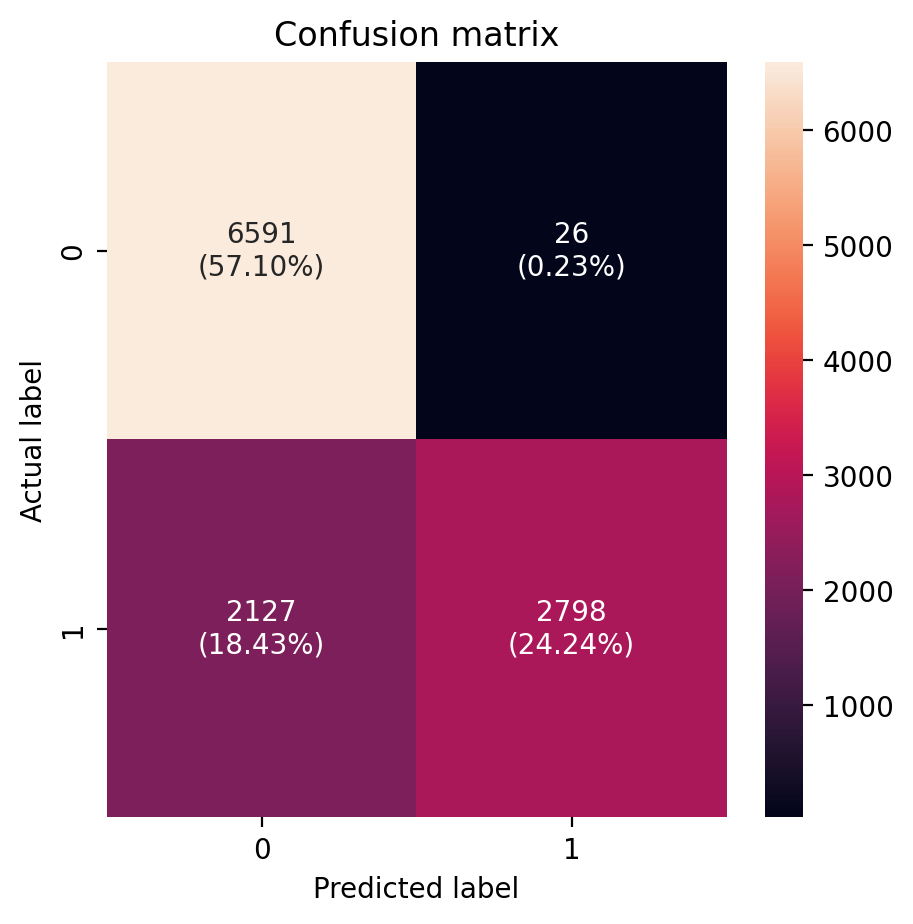

0.8134638710795357 0.8561994666797458 0.8134638710795357 0.7908799574588818
0.8134638710795357 0.8561994666797458 0.8134638710795357 0.8009543001549394


[0.8134638710795357,
 0.8561994666797458,
 0.8134638710795357,
 0.8009543001549394]

In [ ]:
evaluate(model, test_data, test_labels ,best_thresh_weighted)

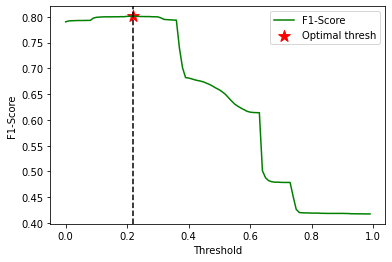

In [ ]:
plt.plot(threshold_vals,list(thresh_weighted.values()), label='F1-Score', c='green')
plt.scatter(best_thresh_weighted, thresh_weighted[best_thresh_weighted], s=150, marker='*', c='red', label='Optimal thresh')
plt.axvline(best_thresh_weighted, linestyle='--', c='black')
plt.ylabel('F1-Score')
plt.xlabel('Threshold')
plt.legend()
plt.show()

In [ ]:
path1 = "/content/drive/MyDrive/MQTT_final/threshold_Exp/"
pickled_list = [[best_thresh_weighted],threshold_vals,list(thresh_weighted.values())]
import pickle
with open(path1+'AE_custom.pkl', 'wb') as file:
    pickle.dump(pickled_list, file)